# Author-ASMA BANO
# Data Science & Business Analytics Internship - The Sparks Foundation
# Task-1: Prediction Using Supervised Machine Learning
# The Aim of the task is to predict the percentage of an student based on the number of study hours using the Linear Progression Supervised Machine Learning Algorithm.


# Importing the Required Libraries

In [5]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#  Reading the data:

In [6]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully!")

Data imported successfully!


# Analyzing the data:

In [7]:
df.head(6)        #gives first 6 values in the dataset


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [8]:
df.tail(6)       #gives last 6 values in the dataset

,Hours,Scores
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
df.shape         #to check the shape of the dataset

(25, 2)

In [10]:
df.isnull().sum()  #to check number of null values

Hours     0
Scores    0
dtype: int64

In [11]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
df.corr()        #to check correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data Visualisation:

Text(0, 0.5, 'Percentage Score')

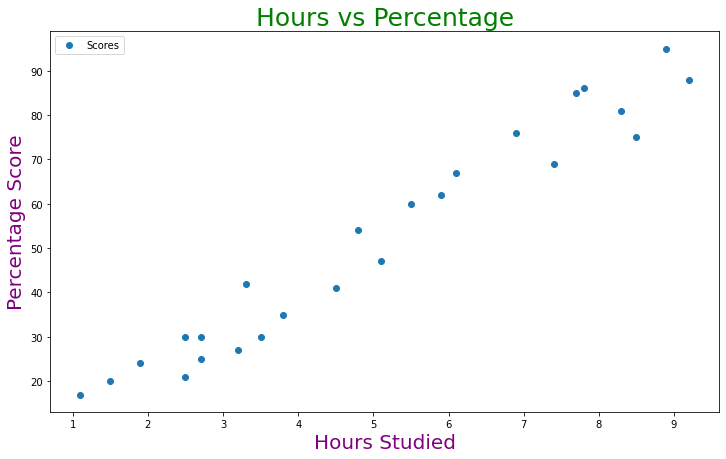

In [15]:
df.plot(x='Hours', y='Scores', style='o', figsize=(12, 7))      #Using the plot() to visualize data
plt.title('Hours vs Percentage',color="green", size=25)      
plt.xlabel('Hours Studied', color="purple",size=20)                    
plt.ylabel('Percentage Score', color="purple",size=20)

# Preparing the data

In [19]:
# Divide the data into "attributes" (inputs) and "labels" (outputs)
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

# Model Training:

In [20]:
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print("The training of model is complete!")

The training of model is complete!


# Plotting the regression line:

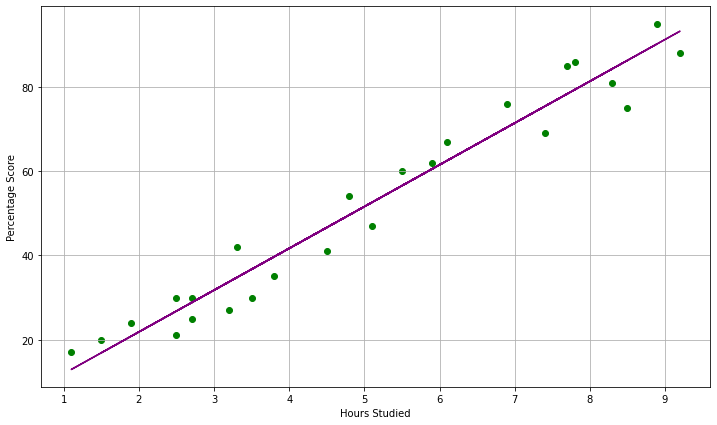

In [24]:
line = regressor.coef_*x+regressor.intercept_

plt.figure(figsize=(12, 7))
plt.scatter(x, y,color='green')
plt.plot(x, line, color="purple")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

In [25]:
#Testing the data in hours
print(x_test)              
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Comparing Actual vs Predicted:

In [26]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [27]:
print("Training Score: ",regressor.score(x_train, y_train))
print("Testing Score: ",regressor.score(x_test, y_test))

Training Score:  0.9515510725211552
Testing Score:  0.9454906892105355


# Predicting the score of a student who studies for 9.25 hours/day:

In [28]:
#Predicting the value using regressor
s = float(input("Enter the Number of Hours: "))
self_prediction = regressor.predict(np.array([s]).reshape(-1,1))     
print("Number of Hours = {} \nPredicted Score = {}".format(s,self_prediction[0]))

Enter the Number of Hours: 9.25
Number of Hours = 9.25 
Predicted Score = 93.69173248737535


# Evaluating the model:

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred)) 
print("Root Mean Squared Error: ",np.sqrt(mean_absolute_error(y_test, y_pred)))
print("R-2 Score: ",r2_score(y_test, y_pred))

Mean Squared Error:  21.598769307217406
Mean Absolute Error:  4.183859899002975
Root Mean Squared Error:  2.0454485813637495
R-2 Score:  0.9454906892105355


# Thus, the predicted score of a student who studies for 9.25 hours/day is 93.691 Marks